<a href="https://colab.research.google.com/github/h1mmeister/MP_Neuron/blob/main/MP_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import sklearn.datasets
import numpy as np

# Loading the dataset

In [39]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [40]:
X = breast_cancer.data
y = breast_cancer.target

In [41]:
print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [42]:
print(X.shape, y.shape)

(569, 30) (569,)


In [43]:
import pandas as pd

In [44]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [45]:
data["class"] = breast_cancer.target

In [46]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [47]:
print(data["class"].value_counts())

1    357
0    212
Name: class, dtype: int64


In [48]:
print(breast_cancer.target_names)

['malignant' 'benign']


# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = data.drop("class", axis = 1)
y = data["class"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 42)

In [52]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (512, 30) (57, 30)


In [53]:
print(y.mean(), y_train.mean(), y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421



# Binarization of Input

In [54]:
import matplotlib.pyplot as plt


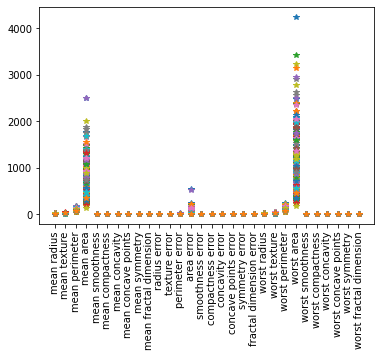

In [55]:
plt.plot(X_train.T, "*")
plt.xticks(rotation = "vertical")
plt.show()

In [56]:
X_binarized_3_train = X_train["mean area"].map(lambda x: 0 if x < 1000 else 1)

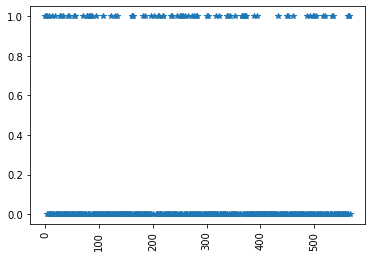

In [57]:
plt.plot(X_binarized_3_train.T, "*")
plt.xticks(rotation = "vertical")
plt.show()

In [58]:
X_binarized_train = X_train.apply(pd.cut, bins = 2, labels = [1,0])

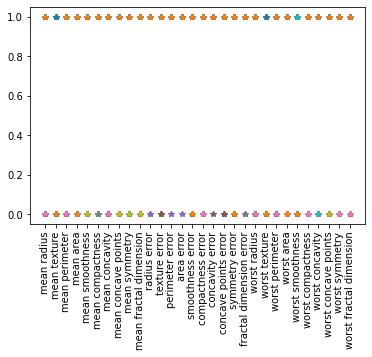

In [59]:
plt.plot(X_binarized_train.T, "*")
plt.xticks(rotation = "vertical")
plt.show()

In [60]:
X_binarized_test = X_test.apply(pd.cut, bins = 2, labels = [1,0])

In [61]:
type(X_binarized_train)

pandas.core.frame.DataFrame

In [62]:
X_binarized_train = X_binarized_train.values
X_binarized_test = X_binarized_test.values

In [63]:
type(X_binarized_train)

numpy.ndarray

# MP Neuron

In [64]:
from random import randint

In [65]:
b = 3

i = randint(0, X_binarized_train.shape[0])

print("For row", i)

if np.sum(X_binarized_train[i, :]) >= b:
  print("MP Neuron inference is Malignant")
else:
  print("MP Neuron inference is Benign")

if y_train[i] == 1:
  print("Ground Truth is Malignant")
else:
   print("Ground Truth is Benign")


For row 141
MP Neuron inference is Malignant
Ground Truth is Benign


In [66]:
b = 3
y_pred_train = []
accurate_rows = 0

for x, y in zip(X_binarized_train, y_train):
  y_pred = (np.sum(x) >= b)
  y_pred_train.append(y_pred)
  accurate_rows += (y == y_pred)

print(accurate_rows, accurate_rows/X_binarized_train.shape[0])

321 0.626953125


In [67]:
for b in range(X_binarized_train.shape[1]+ 1):
  y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarized_train, y_train):
    y_pred = (np.sum(x) >= b)
    y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

  print(b, accurate_rows/X_binarized_train.shape[0])


0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.62890625
14 0.6328125
15 0.638671875
16 0.642578125
17 0.65234375
18 0.662109375
19 0.6640625
20 0.677734375
21 0.6953125
22 0.712890625
23 0.740234375
24 0.775390625
25 0.802734375
26 0.830078125
27 0.861328125
28 0.8515625
29 0.80859375
30 0.71875


In [68]:
from sklearn.metrics import accuracy_score

In [69]:
b = 27

y_pred_test = []


for x in X_binarized_test:
  y_pred = (np.sum(x) >= b)
  y_pred_test.append(y_pred)
accuracy = accuracy_score(y_pred_test, y_test)

print(b, accuracy)

27 0.8421052631578947


# MP Neuron Class


In [76]:
class MPNeuron:
  def __init__(self):
    self.b = None
  def model(self,x):
    return(sum(x) >= self.b)
  def predict(self, X):
    y = []
    for x in X:
      result = self.model(x)
      y.append(result)
    return np.array(y)
  def fit(self, X, y):
    accuracy = {}
    for b in range(X.shape[1]+1):
      self.b = b
      y_pred = self.predict(X)
      accuracy[b] = accuracy_score(y_pred, y)
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b

    print("Optimal value of b ", best_b)
    print("Highest Accuracy ", accuracy[best_b])

In [77]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarized_train, y_train)

Optimal value of b  27
Highest Accuracy  0.861328125


In [79]:
y_test_pred = mp_neuron.predict(X_binarized_test)

In [80]:
accuracy_test = accuracy_score(y_test_pred, y_test)

In [81]:
print(accuracy_test)

0.8421052631578947
